<a href="https://colab.research.google.com/github/manoelneto91/IAFatec/blob/main/trabalhoIA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

$ IMPORTANDO O PANDAS


In [ ]:
import pandas as pd

uri = "https://gist.githubusercontent.com/guilhermesilveira/4d1d4a16ccbf6ea4e0a64a38a24ec884/raw/afd05cb0c796d18f3f5a6537053ded308ba94bf7/car-prices.csv"
dados = pd.read_csv(uri)
dados.head()

,Unnamed: 0,mileage_per_year,model_year,price,sold
0,0,21801,2000,30941.02,yes
1,1,7843,1998,40557.96,yes
2,2,7109,2006,89627.50,no
3,3,26823,2015,95276.14,no
4,4,7935,2014,117384.68,yes


$ RENOMEANDO AS COLUNAS

In [ ]:
a_renomear = {
    'mileage_per_year' : 'milhas_por_ano',
    'model_year' : 'ano_do_modelo',
    'price': 'preco',
    'sold' : 'vendido'
}

dados = dados.rename(columns=a_renomear)
dados.head()

,Unnamed: 0,milhas_por_ano,ano_do_modelo,preco,vendido
0,0,21801,2000,30941.02,yes
1,1,7843,1998,40557.96,yes
2,2,7109,2006,89627.50,no
3,3,26823,2015,95276.14,no
4,4,7935,2014,117384.68,yes


$ TROCANDO AS FEATURES

In [ ]:
a_trocar = {
    'no' : 'nao_vendido',
    'yes' : 'vendido'
}

dados.vendido = dados.vendido.map(a_trocar)
dados.head()

,Unnamed: 0,milhas_por_ano,ano_do_modelo,preco,vendido
0,0,21801,2000,30941.02,vendido
1,1,7843,1998,40557.96,vendido
2,2,7109,2006,89627.50,nao_vendido
3,3,26823,2015,95276.14,nao_vendido
4,4,7935,2014,117384.68,vendido


$ IMPORTANDO O DATETIME E CRIANDO UMA NOVA COLUNA IDADE DO MODELO

In [ ]:
from datetime import datetime

ano_atual = datetime.today().year
dados['idade_do_modelo'] = ano_atual - dados.ano_do_modelo

dados.head()

,Unnamed: 0,milhas_por_ano,ano_do_modelo,preco,vendido,idade_do_modelo
0,0,21801,2000,30941.02,vendido,21
1,1,7843,1998,40557.96,vendido,23
2,2,7109,2006,89627.50,nao_vendido,15
3,3,26823,2015,95276.14,nao_vendido,6
4,4,7935,2014,117384.68,vendido,7


$ CONVERSÃO DE MILHAS PARA KM

In [ ]:
dados['km_por_ano'] = dados.milhas_por_ano * 1.60934
dados.head()

,Unnamed: 0,milhas_por_ano,ano_do_modelo,preco,vendido,idade_do_modelo,km_por_ano
0,0,21801,2000,30941.02,vendido,21,35085.22134
1,1,7843,1998,40557.96,vendido,23,12622.05362
2,2,7109,2006,89627.50,nao_vendido,15,11440.79806
3,3,26823,2015,95276.14,nao_vendido,6,43167.32682
4,4,7935,2014,117384.68,vendido,7,12770.11290


$ EXCLUINDO DADOS 

In [ ]:
dados = dados.drop(columns= ["Unnamed: 0", "milhas_por_ano", "ano_do_modelo"], axis=1)
dados.head()

,preco,vendido,idade_do_modelo,km_por_ano
0,30941.02,vendido,21,35085.22134
1,40557.96,vendido,23,12622.05362
2,89627.50,nao_vendido,15,11440.79806
3,95276.14,nao_vendido,6,43167.32682
4,117384.68,vendido,7,12770.11290


$ SEPARANDO AS COLUNAS

In [ ]:
x = dados[["preco", "idade_do_modelo", "km_por_ano"]]
y = dados["vendido"]
print (x)

          preco  idade_do_modelo   km_por_ano
0      30941.02               21  35085.22134
1      40557.96               23  12622.05362
2      89627.50               15  11440.79806
3      95276.14                6  43167.32682
4     117384.68                7  12770.11290
...         ...              ...          ...
9995   97112.86               15  25060.64248
9996  107424.63               19  21317.31764
9997   93856.99                7  20950.38812
9998   51250.57               10  16840.13376
9999   87945.73               22  19894.66108

[10000 rows x 3 columns]


$ ONDE TUDO ACONTECE!!!

In [ ]:
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score


SEED = 5
np.random.seed(SEED)
treino_x, teste_x, treino_y, teste_y = train_test_split(x, y, test_size = 0.25,
                                                         stratify = y)
print("Treinaremos com %d elementos e testaremos com %d elementos" % (len(treino_x), len(teste_x)))

modelo = DecisionTreeClassifier(max_depth=10)
modelo.fit(treino_x, treino_y)

previsoes = modelo.predict(teste_x)
taxa_de_acerto = accuracy_score(teste_y, previsoes)
taxa_de_acerto = taxa_de_acerto * 100
print("A taxa de acerto foi %.2f%%" % taxa_de_acerto)

Treinaremos com 7500 elementos e testaremos com 2500 elementos
A taxa de acerto foi 77.96%


$ PREVISOES GERADAS

In [ ]:
print (previsoes)

['nao_vendido' 'vendido' 'vendido' ... 'vendido' 'vendido' 'nao_vendido']


$ NUMEROS DO TREINO

In [ ]:
treino_y.value_counts()

vendido        4350
nao_vendido    3150
Name: vendido, dtype: int64

$ NUMEROS DO TESTE



In [ ]:
teste_y.value_counts()

vendido        1450
nao_vendido    1050
Name: vendido, dtype: int64

In [ ]:
SEED = 5
np.random.seed(SEED)
treino_x, teste_x, treino_y, teste_y = train_test_split(x, y, test_size = 0.25,
                                                         stratify = y)
print("Treinaremos com %d elementos e testaremos com %d elementos" % (len(treino_x), len(teste_x)))

modelo = DecisionTreeClassifier(max_depth=3)
modelo.fit(treino_x, treino_y)

previsoes = 

previsoes = modelo.predict(teste_x)
taxa_de_acerto = accuracy_score(teste_y, previsoes)
taxa_de_acerto = taxa_de_acerto * 100
print("A taxa de acerto foi %.2f%%" % taxa_de_acerto)

$ COMO CHEGOU NESSE RESULTADO?

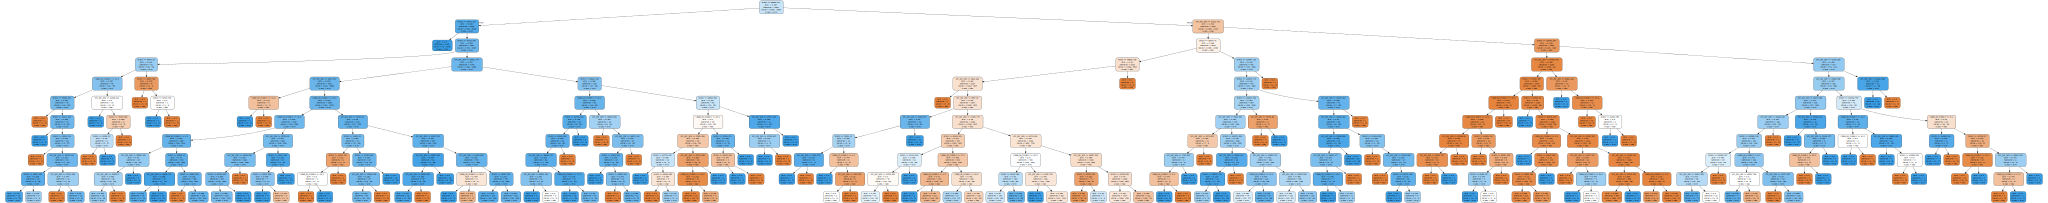

In [ ]:
from sklearn.tree import export_graphviz
import graphviz

features = x.columns
dot_data = export_graphviz(modelo, out_file=None,
                           filled = True, rounded = True,
                           feature_names = features,
                           class_names = ["não", "sim"])
grafico = graphviz.Source(dot_data)
grafico